In [3]:
import pandas as pd

df = pd.read_csv("../data/US-pumpkins.csv")
print(df.head())

   City Name Type       Package      Variety Sub Variety  Grade     Date  \
0  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN  4/29/17   
1  BALTIMORE  NaN  24 inch bins          NaN         NaN    NaN   5/6/17   
2  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
3  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  9/24/16   
4  BALTIMORE  NaN  24 inch bins  HOWDEN TYPE         NaN    NaN  11/5/16   

   Low Price  High Price  Mostly Low  ...  Unit of Sale Quality Condition  \
0      270.0       280.0       270.0  ...           NaN     NaN       NaN   
1      270.0       280.0       270.0  ...           NaN     NaN       NaN   
2      160.0       160.0       160.0  ...           NaN     NaN       NaN   
3      160.0       160.0       160.0  ...           NaN     NaN       NaN   
4       90.0       100.0        90.0  ...           NaN     NaN       NaN   

  Appearance Storage  Crop Repack  Trans Mode  Unnamed: 24  Unnamed: 25  
0     

In [7]:
df.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [11]:
df.columns
required_columns = ['Package', 'Low Price', 'High Price', 'Date']
df = df.loc[:, required_columns]
print(df.head())

        Package  Low Price  High Price     Date
0  24 inch bins      270.0       280.0  4/29/17
1  24 inch bins      270.0       280.0   5/6/17
2  24 inch bins      160.0       160.0  9/24/16
3  24 inch bins      160.0       160.0  9/24/16
4  24 inch bins       90.0       100.0  11/5/16


In [13]:
price = (df['Low Price'] + df['High Price']) / 2
month = pd.DatetimeIndex(df['Date']).month

pumpkin = pd.DataFrame({'Package': df['Package'], 'Month': month, 'Low Price': df['Low Price'], 'High Price': df['High Price'], 'Price': price})

print(pumpkin.head())

        Package  Month  Low Price  High Price  Price
0  24 inch bins      4      270.0       280.0  275.0
1  24 inch bins      5      270.0       280.0  275.0
2  24 inch bins      9      160.0       160.0  160.0
3  24 inch bins      9      160.0       160.0  160.0
4  24 inch bins     11       90.0       100.0   95.0


In [14]:
pumpkin = pumpkin[pumpkin['Package'].str.contains('bushel', case=True, regex=True)]
print(pumpkin)

                   Package  Month  Low Price  High Price   Price
70    1 1/9 bushel cartons      9      15.00        15.0  15.000
71    1 1/9 bushel cartons      9      18.00        18.0  18.000
72    1 1/9 bushel cartons     10      18.00        18.0  18.000
73    1 1/9 bushel cartons     10      17.00        17.0  17.000
74    1 1/9 bushel cartons     10      15.00        15.0  15.000
...                    ...    ...        ...         ...     ...
1738    1/2 bushel cartons      9      15.00        15.0  15.000
1739    1/2 bushel cartons      9      13.75        15.0  14.375
1740    1/2 bushel cartons      9      10.75        15.0  12.875
1741    1/2 bushel cartons      9      12.00        12.0  12.000
1742    1/2 bushel cartons      9      12.00        12.0  12.000

[415 rows x 5 columns]


In [15]:
pumpkin.loc[pumpkin['Package'].str.contains('1 1/9'), 'Price'] = price / (1+1/9)
pumpkin.loc[pumpkin['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [16]:
print(pumpkin)

                   Package  Month  Low Price  High Price  Price
70    1 1/9 bushel cartons      9      15.00        15.0  13.50
71    1 1/9 bushel cartons      9      18.00        18.0  16.20
72    1 1/9 bushel cartons     10      18.00        18.0  16.20
73    1 1/9 bushel cartons     10      17.00        17.0  15.30
74    1 1/9 bushel cartons     10      15.00        15.0  13.50
...                    ...    ...        ...         ...    ...
1738    1/2 bushel cartons      9      15.00        15.0  30.00
1739    1/2 bushel cartons      9      13.75        15.0  28.75
1740    1/2 bushel cartons      9      10.75        15.0  25.75
1741    1/2 bushel cartons      9      12.00        12.0  24.00
1742    1/2 bushel cartons      9      12.00        12.0  24.00

[415 rows x 5 columns]


C:\Users\bk364\AppData\Local\Temp\ipykernel_15284\538349415.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


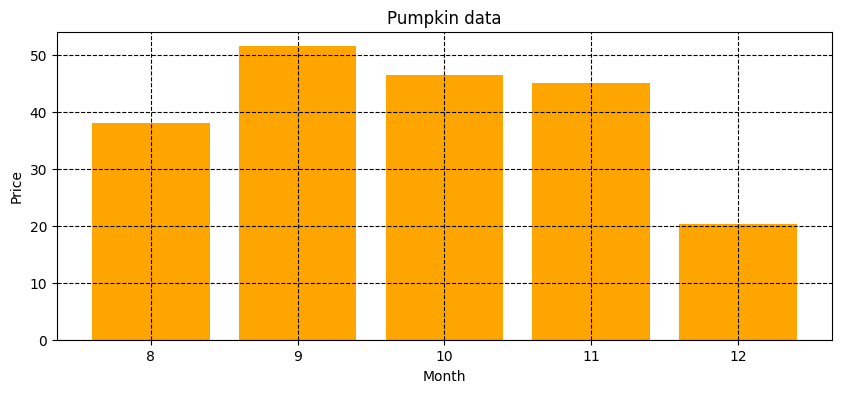

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,4))
price = pumpkin.Price
month = pumpkin.Month
plt.bar(x=month, height=price, color='orange')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid(color='black', linestyle='--')
plt.title('Pumpkin data')
fig.show()